## NLP

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [12]:
data = pd.read_csv('data_com.csv', index_col=False, delimiter = ',')
data.head()

,note,commentaire
0,4.0,une bonne suite pour les aventures de sonic au...
1,5.0,Cette suite de sonic est incroyable !Le fan qu...
2,4.5,Très bon film ont retrouve ce qui fait l'espri...
3,4.0,"Super film de ouf, le fait que Knuckles soit d..."
4,3.0,Malgré deux nouveaux personnages de l'univers ...


In [13]:
data.isna().sum()

note           0
commentaire    1
dtype: int64

In [14]:
data.dropna(inplace=True)
data.isna().sum()

note           0
commentaire    0
dtype: int64

In [15]:
data.loc[(data.note>3),'sentiment']=1
data.loc[(data.note<=3),'sentiment']=0
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7366 entries, 0 to 7366
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   note         7366 non-null   float64
 1   commentaire  7366 non-null   object 
 2   sentiment    7366 non-null   float64
dtypes: float64(2), object(1)
memory usage: 230.2+ KB


Text(0.5, 1.0, 'répartition par sentiment')

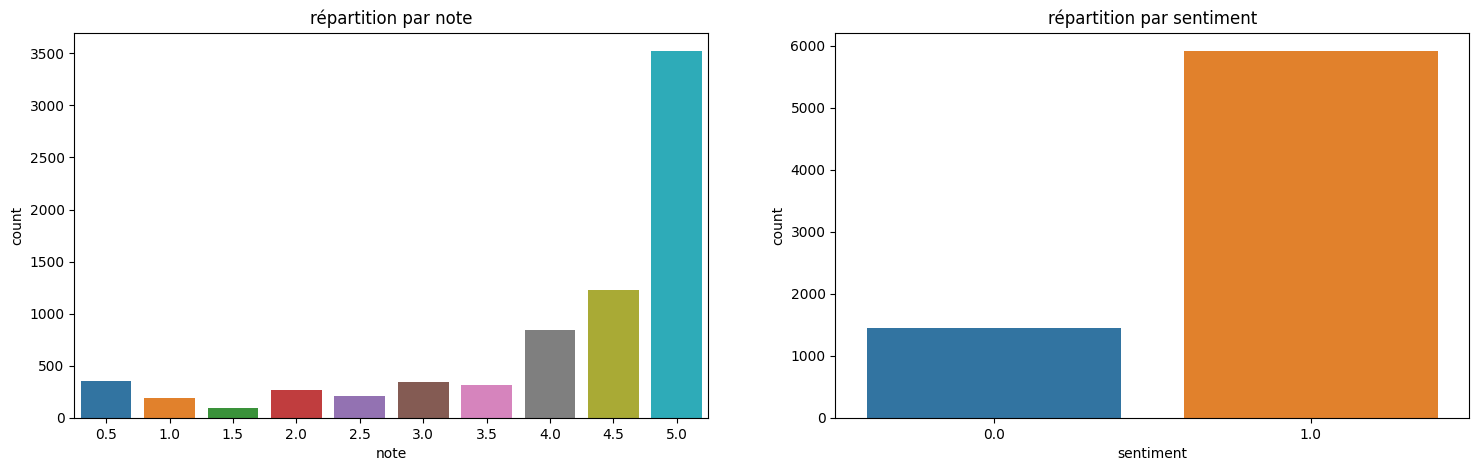

In [16]:
f, ax = plt.subplots(1, 2, figsize=(18, 5))
sns.countplot(x = data.note, data=data, ax=ax[0])
ax[0].set_title("répartition par note")
sns.countplot(x = data.sentiment, data=data, ax=ax[1])
ax[1].set_title("répartition par sentiment")

In [339]:
pd.crosstab(data.note, data.sentiment, margins=True).style.background_gradient(cmap='summer_r')

sentiment,0.000000,1.000000,All
note,,,
0.500000,351,0,351
1.000000,192,0,192
1.500000,98,0,98
2.000000,268,0,268
2.500000,205,0,205
3.000000,340,0,340
3.500000,0,317,317
4.000000,0,842,842
4.500000,0,1231,1231


In [17]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
y = data.sentiment
X = data.commentaire

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)

(5892,) (1474,)


googletrans et google_trans_new refusent de fonctionner indiquant nonetype systématiquement, y compris lorsque la phrase est écrite directement dedans.

In [21]:
from deep_translator import GoogleTranslator

In [22]:
def back_translate(sequence, langue):    
    #translate to new language and back to original
    translated = GoogleTranslator(target = langue).translate(sequence)
    #translate back to original language
    translated_back = GoogleTranslator(target = 'fr').translate(translated)
    
    if translated_back != sequence:
        return translated_back
    elif translated_back == sequence:
        translated_bis = GoogleTranslator(target = 'ja').translate(sequence)
        #translate back to original language
        translated_back_bis = GoogleTranslator(target = 'fr').translate(translated)
        return translated_back_bis

In [23]:
langue=['en','nl']
for i in langue:
    for commentaire in X_train[y_train == 0]:
        print(commentaire)
        longueur = len(commentaire)
        if longueur < 4000 and commentaire!='?????????????????????????!!!!!!!!!!!!!!!!!!!!!!!!!!!!' and commentaire!='***********************************************************':
            output_translate = back_translate(commentaire, i)
            X_train = pd.concat([X_train,pd.Series(output_translate, dtype=np.str_)])
            y_train = pd.concat([y_train,pd.Series(0, dtype = np.float64)])

Un scénario solide mais réalisation décevante..... film trop long, plus un drame qu'un film d'action. Le réalisateur insiste plus sur les remords du personnage principale que sur le monde des rêves et c'est bien dommage. Encore une fois, beaucoup de bruits médiatiques pour pas grand chose ........
Inception est un film familiale et accessible. Le scénario à l'air d'être compliqué mais enfaite est très simple. Je m'attendais à une intrigue plus poussée où l'on confordrait le rêve et la réalité. En effet, le totem d'Ariane et des autres personnages secondaires n'ont pas été exploités alors que ça aurait pu être un excellent fil rouge. Le film s'inspire beaucoup de Matrix et d'Ocean Eleven. J'ai passé un bon moment mais je n'ai pas été subjuguée.
Ce film est long, très ennuyeux et surtout extrêmement confus. Je ne comprends pas les critiques de certains qui font de ce film un chef d oeuvre.
Nul de chez nul. Aucune crédibilité pour ce scénario tiré les cheveux mais genre a rendre n'importe

KeyboardInterrupt: 

In [24]:
print(X_train.size, y_train.size)

8961 8961


In [25]:
print(y_train.value_counts())

1.0    4724
0.0    4237
dtype: int64


In [26]:
import joblib
model_complet={ "Xtrain_translate":X_train,
                "ytrain_translate":y_train,
              }

joblib.dump(model_complet, 'X_train_trad_tot.joblib')
X_train = joblib.load('X_train_trad_tot.joblib')['Xtrain_translate']
y_train = joblib.load('X_train_trad_tot.joblib')['ytrain_translate']

In [27]:
def standardize_text(donnees):
    donnees = donnees.str.replace(r"http\S+", "",regex=True)
    donnees = donnees.str.replace(r"http", "",regex=True)
    donnees = donnees.str.replace(r"@\S+", "",regex=True)
    donnees = donnees.str.replace(r"[0-9(),;!:?@<>.=\'\`\"\-\_\n]+", " ",regex=True)
    donnees = donnees.str.replace(r"@", "at",regex=True)
    donnees = donnees.str.replace("é", "e")
    donnees = donnees.str.replace("è", "e")
    donnees = donnees.str.lower()
    return donnees

In [28]:
X_train_standard = standardize_text(X_train)
X_test_standard = standardize_text(X_test)

In [193]:
'''
mots_neg, mots_pos, liste_stopwords=[],[],[]
for i in X_train[y_train == 0]:
    neg = i.split()
    mots_neg+=neg
for i in X_train[y_train == 1]:
    pos = i.split()
    mots_pos+=pos

liste_stopwords = list(set(mots_neg) & (set(mots_pos)))
liste_stopwords += ['nolan', 'christopher', 'dicaprio', 'leonardo', 'marion', 'cotillard', 'ellen', 'page', 'cillian', 'murphy', 'tom', 'hardy', 'joseph', 'gordon levitt', 'inception',
'sonic', 'knuckles', 'idris', 'elba', 'robotnik', 'jim', 'carrey']
'''

In [206]:
#len(liste_stopwords)

6961

In [29]:
liste_stopwords = ['nolan', 'christopher', 'dicaprio', 'leonardo', 'marion', 'cotillard', 'ellen', 'page', 'cillian', 'murphy', 'tom', 'hardy', 'joseph', 'gordon levitt', 'inception',
'sonic', 'knuckles', 'idris', 'elba', 'robotnik', 'jim', 'carrey']

In [30]:
def lemmatizer_stopwords(data):
    lemmatizer = FrenchLefffLemmatizer()
    corpus = []
    for i in range(0, len(data)):
        message = data.iloc[i]
        message = message.split()
        message =[word for word in message if not word in set(stopwords.words('french') + liste_stopwords)]
        message = [lemmatizer.lemmatize(word, 'n') for word in message]
        message = [lemmatizer.lemmatize(word, 'v') for word in message]
        message = ' '.join(message)
        corpus.append(message)
    return corpus

In [31]:
X_train_lem = lemmatizer_stopwords(X_train_standard)
X_test_lem = lemmatizer_stopwords(X_test_standard)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X_train_vec = vectorizer.fit_transform(X_train_lem)
X_test_vec = vectorizer.transform(X_test_lem)

### LGBMClassifier

In [34]:
import lightgbm as lgb
classifier = lgb.LGBMClassifier()
classifier.fit(X_train_vec, y_train)

LGBMClassifier()

              precision    recall  f1-score   support

         0.0       0.66      0.70      0.68       286
         1.0       0.93      0.91      0.92      1188

    accuracy                           0.87      1474
   macro avg       0.79      0.81      0.80      1474
weighted avg       0.88      0.87      0.87      1474

Accuracy of LightGBM Model: 87.24559023066486 %


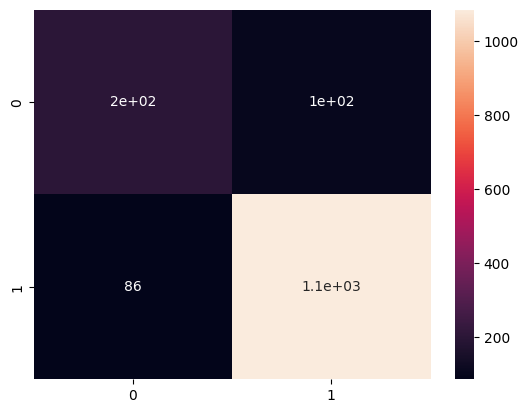

In [35]:
y_pred = classifier.predict(X_test_vec)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
acc = accuracy_score(y_pred, y_test)
report = classification_report(y_test, y_pred)
print(report)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)
print("Accuracy of LightGBM Model:", acc*100,"%")

### Logistic Regression

L'accuaracy score est de : 89.75576662143826


<AxesSubplot: >

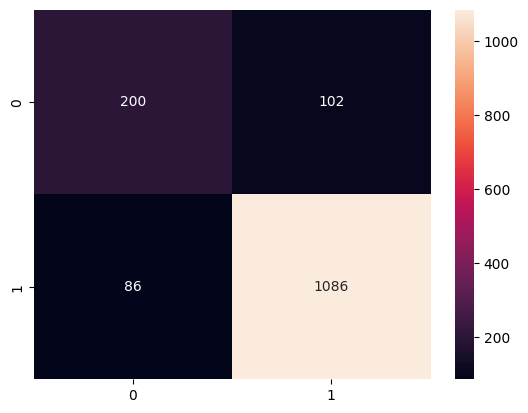

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

regressor = LogisticRegression(random_state=0, multi_class="ovr")
regressor.fit(X_train_vec, y_train)
y_pred_reg = regressor.predict(X_test_vec)

acc_reg = accuracy_score(y_pred_reg, y_test)
print("L'accuaracy score est de :", acc_reg * 100)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='d')

In [37]:
def standardize_phrase(donnees):
        donnees = donnees.replace(r"http\S+", "")
        donnees = donnees.replace(r"http", "")
        donnees = donnees.replace(r"@\S+", "")
        donnees = donnees.replace(r"[0-9(),;!:?@<>.=\'\`\"\-\_\n]", " ")
        donnees = donnees.replace(r"@", "at")
        donnees = donnees.lower()
        
        lemmatizer = FrenchLefffLemmatizer()
        corpus = []
        message = donnees.split()
        message =[word for word in message if word not in stopwords.words('french')]
        message = [lemmatizer.lemmatize(word, 'n') for word in message]
        message = [lemmatizer.lemmatize(word, 'v') for word in message]
        message = ' '.join(message)
        corpus.append(message)
        
        return corpus
    


In [38]:
def test_com(com):
    com_standard = standardize_phrase(com)
    com_vector = vectorizer.transform(com_standard)
    print('Bien !' if classifier.predict(com_vector)[0] == 1 else 'pas bien !')   
    print(classifier.predict_proba(com_vector))
    

In [39]:
test_com(f"""Bien trop caricatural.....et le personnage de Magalie joué par Laure Calamy est trop exagéré....et en devient agaçant.....
Et gâche notre plaisir avec ces beaux paysages grecs qui appelle à ma farniente , au repos , à la légèreté.
Et que dire du côté pseudo profond qu'on essaie de nous servir sur la fin du film.
Kristin Scott Thomas dans un rôle de baba cool soixante-huitarde est inattendue...on la reconnaît à peine d'ailleurs....mais toujours aussi belle et magnifique.....et juste dans son rôle.""")

pas bien !
[[0.86877365 0.13122635]]


- 13/01/23 11:30 - Sans data augmentation ou équilibrage des deux classes et TfidfVectorizer + LGBMClassifier(utiliser dans le tuto), le résultat est de 87% !
- 13/01/23 13:40 - Même paramètre qu'au dessus, mais avec suppression des mots en commun entre les com + et -. Le model chutte à 80% ! à avoir si je garde ou non !
- 13/01/23 14:00 - Toujours sans data augmentation et sans équilibrage + model logisticRegression + mot en commun => 80%
- 13/01/23 14:20 - idem que précédemment, mais sans mot en commun => 84%
- 13/01/23 22:00 - data augmentation par back translation (qq prob pour le mettre en place et qui n'a pas finit, encore une erreur au bout de 45 min, début traduction allemand) => LGBMClassifier = 87% et logisticRegression = 89%
- 14/01/23 11:00 - data augmentation par back translation (après une 1h40, toujours pas finit, je stoppe avant, 4700 + pour 4200 -) => LGBMClassifier = 87% et logisticRegression = 89% (même résultat qu'hier !)